In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
df = pd.read_csv("netflix_titles.csv", lineterminator = '\n')

In [235]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [236]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [237]:
#clean data

In [238]:
#droping columns of director,cast and description
cols=['director','cast','description']
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [240]:
df.isnull().sum()

show_id           0
type              0
title             0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64

In [241]:
#Handling Missing value
df['country'] = df['country'].fillna('Unknown')
# filling missing values (NaN) in the rating column with the most frequent (mode) rating in the dataset.
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna('Unknown')


In [242]:
df.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
dtype: int64

In [243]:
df['date_added'] = df['date_added'].str.strip()  # Remove leading/trailing spaces
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].fillna(pd.to_datetime('2000-01-01'))

In [244]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [245]:
#str.strip() - cleans up entries like " August 4, 2017"
#errors='coerce' - any badly formatted date becomes NaT (missing datetime), avoiding crashes

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   country       8807 non-null   object        
 4   date_added    8807 non-null   datetime64[ns]
 5   release_year  8807 non-null   int64         
 6   rating        8807 non-null   object        
 7   duration      8807 non-null   object        
 8   listed_in     8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 619.4+ KB


In [247]:
df.duplicated().sum()

np.int64(0)

In [248]:
df.describe()

,date_added,release_year
count,8807,8807.000000
mean,2019-05-09 05:09:01.614624768,2014.180198
min,2000-01-01 00:00:00,1925.000000
25%,2018-04-03 00:00:00,2013.000000
50%,2019-07-01 00:00:00,2017.000000
75%,2020-08-18 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [249]:
print(df.columns.tolist())


['show_id', 'type', 'title', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']


In [252]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [253]:
df['rating'].head()

0    PG-13
1    TV-MA
2    TV-MA
3    TV-MA
4    TV-MA
Name: rating, dtype: object

In [254]:
df['listed_in'] = df['listed_in'].str.strip() 

In [255]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
#we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie


In [256]:
df['listed_in'] = df['listed_in'].str.split(', ')
# explode the lists
df = df.explode('listed_in').reset_index(drop=True)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,s3,TV Show,Ganglands,Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows


In [257]:
df['listed_in'].head()

0             Documentaries
1    International TV Shows
2                 TV Dramas
3              TV Mysteries
4            Crime TV Shows
Name: listed_in, dtype: object

Data Visualiziation

1. Movies vs TV Shows count

In [258]:
sns.set(style='whitegrid')

<function matplotlib.pyplot.show(close=None, block=None)>

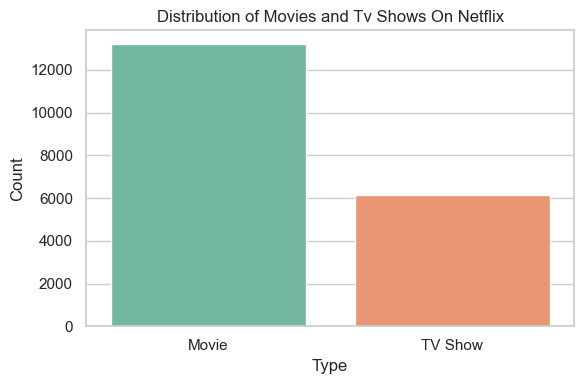

In [263]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title("Distribution of Movies and Tv Shows On Netflix")
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show

2. Trend of content added over years

In [264]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
#Convert date_added to datetime and extract the year


In [265]:
df[['title', 'date_added', 'year_added']].head()
#viewing the extracted date

,title,date_added,year_added
0,Dick Johnson Is Dead,2021-09-25,2021
1,Blood & Water,2021-09-24,2021
2,Blood & Water,2021-09-24,2021
3,Blood & Water,2021-09-24,2021
4,Ganglands,2021-09-24,2021


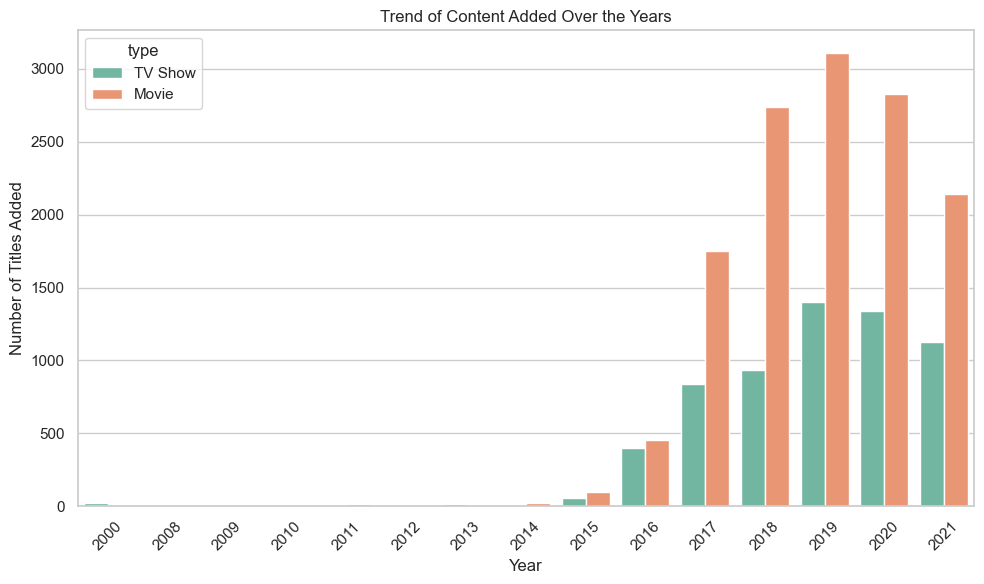

In [268]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='year_added', hue='type', palette='Set2', order=sorted(df['year_added'].dropna().unique()))
plt.title("Trend of Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Top producing countries

In [270]:
country_data = df['country']


In [272]:
# Split countries and explode into individual rows
country_split = country_data.str.split(',').explode().str.strip()

In [274]:
# Count occurrences and get top 10
top_countries = country_split.value_counts().head(10)

In [282]:
print(df['country'].value_counts().head(10))

country
United States     5002
India             2626
Unknown           1722
United Kingdom     957
Japan              588
South Korea        566
Spain              383
Canada             347
France             306
Turkey             278
Name: count, dtype: int64


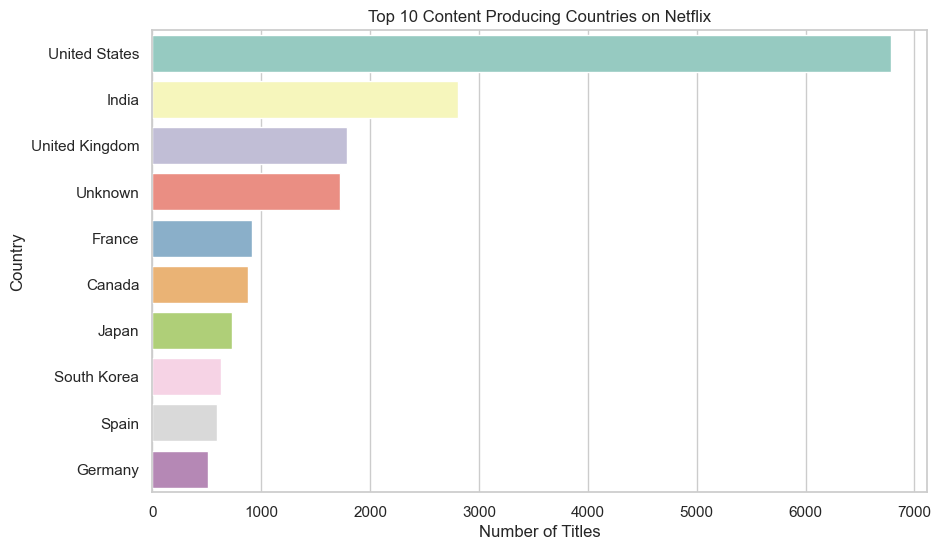

In [283]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index,hue=top_countries.index, palette='Set3',legend=False)
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

4. Most common ratings (PG, TV-MA, etc.)

In [281]:
top_ratings = df['rating'].value_counts().head(10)

In [286]:
print(df['rating'].value_counts().head(10))

rating
TV-MA    7316
TV-14    5246
TV-PG    1908
R        1582
PG-13     998
PG        607
TV-Y7     529
TV-G      459
TV-Y      406
NR        168
Name: count, dtype: int64


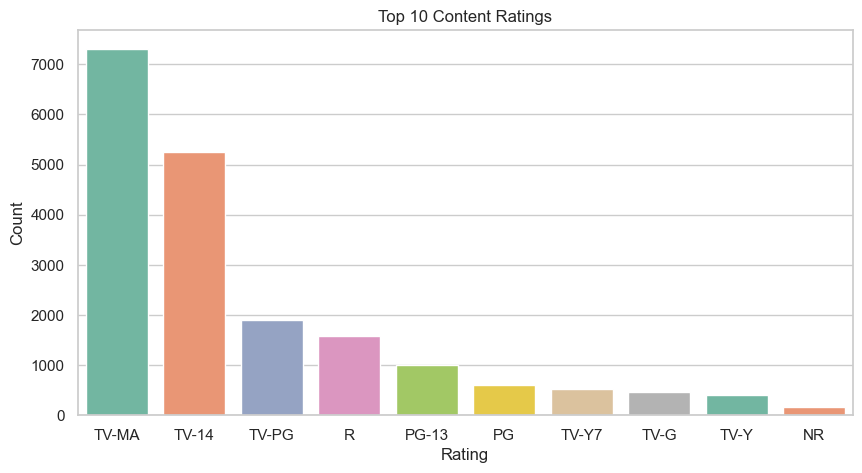

In [288]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_ratings.index, y=top_ratings.values,hue=top_ratings.index, palette='Set2',legend = False)
plt.title("Top 10 Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

5. Top 10  genres (listed_in) across the platform

In [290]:
df["listed_in"].describe()

count                    19323
unique                      42
top       International Movies
freq                      2752
Name: listed_in, dtype: object

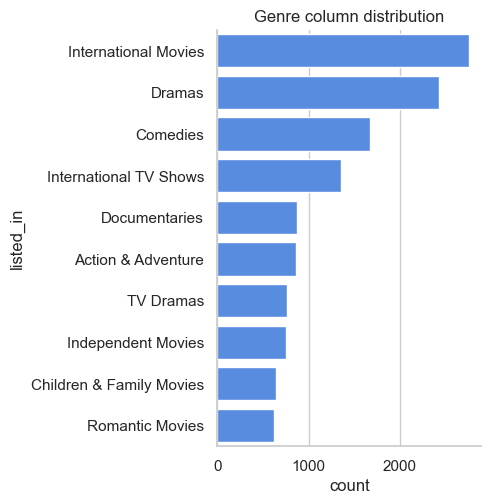

In [294]:
sns.catplot(y= 'listed_in', data = df, kind='count',
            order = df["listed_in"].value_counts().head(10).index,
            color = '#4287f5')
plt.title("Genre column distribution")
plt.show()